### Libraries

In [1]:
import sys
sys.path.append('../python-scripts')
from decision_tree_classifier import decision_tree_classifier

In [2]:
from math import log
from collections import Counter
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Data
The Iris dataset is some easily separable, "training-wheels" data. It will be very useful for testing a simple decision tree algorithm from scratch.

In [4]:
iris = load_iris()

In [5]:
features = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
iris.data.shape

(150, 4)

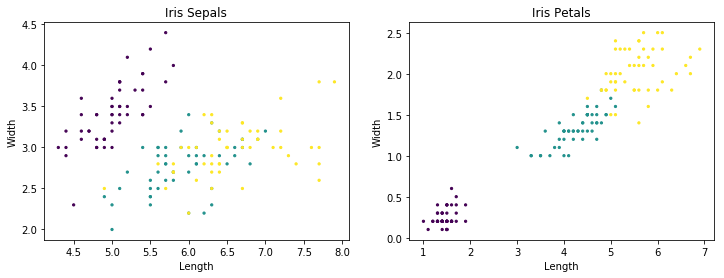

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(features['sepal length (cm)'],
            features['sepal width (cm)'],
            c=iris.target,
            s=5)
ax1.set_xlabel('Length')
ax1.set_ylabel('Width')
ax1.set_title('Iris Sepals')
ax2.scatter(features['petal length (cm)'],
            features['petal width (cm)'],
            c=iris.target,
            s=5)
ax2.set_xlabel('Length')
ax2.set_ylabel('Width')
ax2.set_title('Iris Petals')
plt.savefig('../blog/iris_dataset.png', transparent=True);

In [8]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

### Uncertainty and Impurity

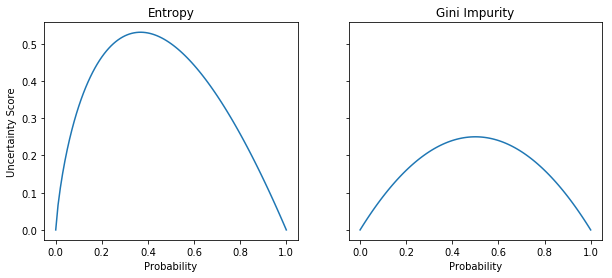

In [9]:
p_values = np.arange(0, 1.01, 0.01)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#ax1.plot(p, [entropy(p) for p in p])
ax1.plot(p_values, [-p*log(p, 2) if p else 0 for p in p_values])
ax1.set_title('Entropy')
ax1.set_xlabel('Probability')
ax1.set_ylabel('Uncertainty Score')
ax2.plot(p_values, [p*(1-p) for p in p_values])
ax2.set_title('Gini Impurity')
ax2.set_xlabel('Probability')
plt.savefig('../blog/uncertainty.png', transparent=True);

In [10]:
def entropy(labels):
        """Calculates the entropy for a given set of labels."""
        probs = [freq/len(labels) for freq in Counter(labels).values()]
        return sum(-p*log(p, 2) for p in probs if p)

In [11]:
def gini(labels):
        """Calculates the gini impurity for a given set of labels"""
        probs = [freq/len(labels) for freq in Counter(labels).values()]
        return sum(p*(1-p) for p in probs if p)

In [12]:
entropy([True, True, True, True])

0.0

In [13]:
entropy([True, True, False, False])

1.0

In [14]:
gini([False, False, False, False])

0.0

In [15]:
gini([True, True, False, False])

0.5

### Decision Trees From Scratch

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, iris.target)

#### Grow (Fit)

In [17]:
dt = decision_tree_classifier(metric='entropy', repeat_features=True)
dt.fit(x_train, y_train)

In [18]:
dt.tree

{'feature_name': 'petal length (cm)',
 'information_gain': 0.9241335419915457,
 'left': 0,
 'right': {'feature_name': 'petal width (cm)',
  'information_gain': 0.6536210311348951,
  'left': {'feature_name': 'petal length (cm)',
   'information_gain': 0.180210923743582,
   'left': {'feature_name': 'petal width (cm)',
    'information_gain': 0.1792560669283215,
    'left': 1,
    'right': 2,
    'split_point': 1.7},
   'right': {'feature_name': 'petal width (cm)',
    'information_gain': 0.4199730940219749,
    'left': 2,
    'right': {'feature_name': 'sepal length (cm)',
     'information_gain': 0.9182958340544896,
     'left': 1,
     'right': 2,
     'split_point': 7.2000000000000002},
    'split_point': 1.6000000000000001},
   'split_point': 5.0},
  'right': {'feature_name': 'petal length (cm)',
   'information_gain': 0.11453208987010625,
   'left': {'feature_name': 'sepal length (cm)',
    'information_gain': 0.9182958340544896,
    'left': 1,
    'right': 2,
    'split_point': 6.0}

#### Predict

In [19]:
pred = dt.predict(x_test)

In [20]:
accuracy_score(y_test, pred)

0.97368421052631582

In [21]:
confusion_matrix(y_test, pred)

array([[12,  0,  0],
       [ 1, 10,  0],
       [ 0,  0, 15]])

### Compare to sklearn
#### Grow (Fit)

In [22]:
sktree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
sktree.fit(x_train, y_test)

ValueError: Number of labels=38 does not match number of samples=112

#### Predict

In [ ]:
sk_pred = sktree.predict(x_test)
accuracy_score(y_test, sk_pred)

In [ ]:
confusion_matrix(y_test, sk_pred)